In [1]:
import helpers as h
import sub_gradient
import qlearning_astar
import numpy as np
import geopandas as gpd
import pickle
import depth_first_search

In [2]:
adj_matrix_path = "preprocessed_data/adjacency_matrix_osdpm.txt"
gdf_path = "preprocessed_data/gdf_osdpm_connected.gpkg"
node_dict_path = "preprocessed_data/node_dict_osdpm.pickle"

In [3]:
graph = h.load_adjacency_matrix_safe(adj_matrix_path)
gdf = gpd.read_file(gdf_path)

with open(node_dict_path, 'rb') as f:
        node_dict = pickle.load(f)

In [4]:
### source and target

origin_lat = 52.350790
origin_lon = 4.798740
destination_lat = 52.363189
destination_lon = 4.792537

source, distance = h.find_nearest_node(origin_lat, origin_lon, node_dict)
target, distance = h.find_nearest_node(destination_lat, destination_lon, node_dict)

### sub-gradient algorithm

In [5]:


constraints = [100000, 100000, 100000, 100000] # arbitrary constraints

weights = [1,5,1,1] #increase to minimize value

routes = sub_gradient.subgradient_multiple_routes(graph, source, target, constraints, weights, max_iter=100, tol=1e-3)

<Axes: >

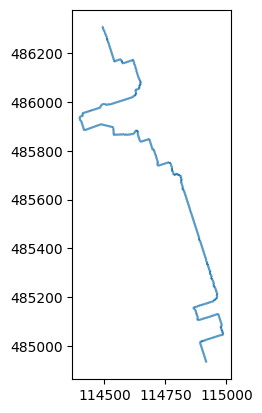

In [6]:
# path list to gdf and visualisation

h.get_route_gdf(routes[0][1], gdf).plot()

#### Q-learning a star

In [7]:
G = h.convert_to_multidigraph(gdf)

In [8]:
weights = {'length': -1, 'crossing': -2, 'bike': 5, 'walk': 3}

# initialize Q-Learning A* class
ql_learner = qlearning_astar.QLearningHeuristicAStar(G, weights, maximize_bike=True)
ql_learner.simulate_random_walks(source, target, num_steps=1)

# path determined using Q-learning-enhanced A*
route = ql_learner.a_star(source, target)

<Axes: >

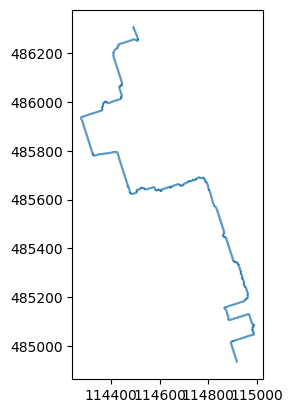

In [9]:
# path list to gdf and visualisation

h.get_route_gdf(route['path'], gdf).plot()

### depth-first-search algorithm

In [10]:
path = depth_first_search.dfs_route_planning(graph, source, target, 4, lower_bounds_algorithm="single_objective_value_iteration")

Value iteration done.
objectives_shortest_paths: [[2317.8099999999804, 32, 2317.8099999999804, 0.0], [3619.2299999998527, 22, 3619.2299999998527, 0.0], [2173.639999999994, 71, 2173.639999999994, 0.0], [2920.6699999999246, 54, 2920.6699999999246, 0.0]]
[2173.639999999994, 22, 2173.639999999994, 0.0]
[3619.2299999998527, 71, 3619.2299999998527, 0.0]
Finding a pareto-optimal route took 229.11 seconds.
Objective cost:  (2453.889999999971, 34, 2245.349999999988, 0.0)
Route length:  1226


<Axes: >

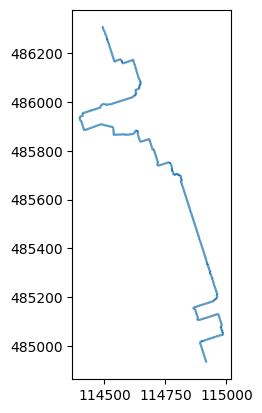

In [11]:
h.get_route_gdf(path, gdf).plot()

In [22]:
path = depth_first_search.dfs_route_planning(graph, source, target, 4, lower_bounds_algorithm="reverse_dijkstra")

Value iteration done.
objectives_shortest_paths: [[2317.8099999999804, 32, 2317.8099999999804, 0.0], [3619.2299999998527, 22, 3619.2299999998527, 0.0], [2173.639999999994, 71, 2173.639999999994, 0.0], [2920.6699999999246, 54, 2920.6699999999246, 0.0]]
[2173.639999999994, 22, 2173.639999999994, 0.0]
[3619.2299999998527, 71, 3619.2299999998527, 0.0]
Finding a pareto-optimal route took 0.86 seconds.
Objective cost:  (2453.889999999971, 34, 2245.349999999988, 0.0)
Route length:  1226


<Axes: >

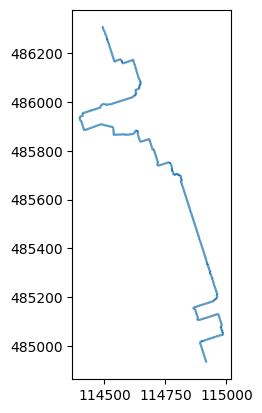

In [23]:
h.get_route_gdf(path, gdf).plot()